# Model Validation

## Understanding the impact of data on performance

## Overview

How can you increase your confidence in a model's performance?

* Understanding model performance
    * Overfitting, underfitting, generalisation
* Data partitioning approaches
    * Train/test/validation splits
    * Cross-validation

In practical data analysis, the data we work with is only a sample of what we are interested in.

For instance, we might be interested in an election turnout. It is expensive, time-consuming, and impractical to ask questions to every eligible voter. Therefore, we try to get a representative sample and work with that.

Another example might be setting a manufacturing target for the next quarter. We cannot foresee the future thus can only use past/historic data to build a model to estimate future demand.

The objective of this unit is to cover concepts relating to validating a model. We want a model that not only explains the data we have and but also explains what we are interested in (some quantity about the population). We use model validation to reduce our vulnerability to over-estimating a model's performance (due to some fluke of the training process) while making the most of the data that is available.


First, we'll look at some core concepts in machine learning and how these relate to models and data. Next we will look at some methods for evaluating model's performance.

## Overview

* Data partitioning implications
    * Avoiding data leakage
* Hyperparameter tuning
    * Finding the best settings

Then, we'll see specific situations where these methods should also be applied outside the train/test cycle.

Finally, different algorithms have different parameters which may have different optimal values for your task. We will look at how to reconcile the problem of limited data with the problem of fine-tuning our models to have the best performance.

## Bias and Variance


The prediction error for any machine learning algorithm can be broken down into three parts:
* Bias error
* Variance error
* Irreducible error

We focus on bias and variance as the irreducible error is due to noise in the data and outside our control.

As the name would suggest the irreducible error can not be reduced by altering our model regardless of the choice of the algorithm. This error arises as a result of elements outside of our control, such as statistical noise in the data. Hence we focus on reducing the  Bias and Variance errors.

## Bias 

* Bias represents the expected (mean) difference of our predictions and the targets. 


* It can be thought of as an error arising from the simplifying assumptions made by a given model in order to arrive at the target function.


* **Low bias**: Low bias models incorporate relatively few assumptions regarding the form of the target function. Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.


* **High bias**: High bias models incorporate more assumptions. Examples of high bias algorithms include linear and logistic regression.




## Variance


* Variance refers to the variability in model prediction depending on the training data i.e. how much the target function will alter if different portions of the training data are used.


* If an algorithm successfully identifies the relationships between input and output variables, then altering which portion of the training data is used should have little impact on the predicted function. This would be a low variance model.


* Alternatively the predictions of a high variance model will vary greatly depending on the training data used.

## Bias/Variance tradeoff

- We want our models to **both**: 
    - (a) accurately explain (capture patterns in) the training data 
    - (b) generalise to new data
    
![](img/bias_variance.png)
 

In [ ]:
import numpy as np

# Create data
x = [2, 3, 5, 7, 10, 13, 16, 18]
y = [95, 80, 67, 69, 65, 70, 79, 90]

xp = np.linspace(2, 22, 100)

## Bias/Variance tradeoff

In [ ]:
z1 = np.polyfit(x, y, 1) # fit polynomial of degree 1
p1 = np.poly1d(z1)

z2 = np.polyfit(x, y, 2) # fit polynomial of degree 2
p2 = np.poly1d(z2)

z7 = np.polyfit(x, y, 7) # fit polynomial of degree 7
p7 = np.poly1d(z7)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
_ = plt.plot(x, y, 'o', xp, p1(xp), '-', xp, p2(xp), '--', xp, p7(xp), '-.')
plt.ylim(60,110)
plt.grid(color='lightgray')
plt.show()


Consider the above example, where we want to train a model to fit 8 data points.

If we fit a linear regression (polynomial of degree 1), we get the orange line, which is a poor fit.

With a polynomial of degree 2, we get the green line that seems like is a good fit.

With a polynomial of degree 7 (the red line), we get a 'perfect' fit, which is not necessarily a good thing. In fact, we can have a perfect fit because we have 8 data points and 8 parameters. This model overfit the training data and is unlikely to generalise well to unseen data. 

In terms of bias and variance, the linear regression (orange) line has a slope of 0.01 (near 0) thus almost always predicts the same $y$ for an input $x$. There is very little variation in the prediction, i.e. low variance, and we might say that the model is biased towards predicting the $y$ value it always predicts. 

The red line, by contrast, is the extreme of no bias (since it is a perfect fit). However, it has clearly overfit to noise in the data instead of learning a general function. 

## Bias/Variance trade-off

- We can reveal the bias/variance trade-off explicitly by decomposing the mean square error for our model.
- Say our target (dependent variable) is $y$ and explanatory variable is $x$, and we want to learn $f(x)$ that predicts $y$.
- The mean squared error (MSE) for $f$ can be rewritten as:
\begin{equation}
\begin{split} 
MSE(f(x)) &= E[(f(x)-y)^2]
&=\text{Var}(f(x))+\left[\text{Bias}f(x)\right]^2+\text{Var}(\epsilon)
\end{split}
\end{equation}
    where $\epsilon$ is the random noise in the data.

This way of writing MSE as the sum of the bias and variance of our model is often known as the bias–variance decomposition.

The variance is the expectation of the squared difference between the mean prediction and the prediction for a single datapoint. 

Bias represents the expected (mean) difference of our predictions and the targets.

The final part is the variance of the irreducible error that arise due to the noise in the data.

The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge regression. Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution. Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance.

## When is a model "good"?

* Complex model has learned the training data perfectly
* Overfitting: we have unknowingly learned noise
* How will it perform on new data?

In [ ]:
x_new = [19, 21]
y_new = [101, 105]

plt.figure(figsize=(10,6))
_ = plt.plot(x, y, 'o', x_new, y_new, 'v',  xp, p7(xp), '-.')
plt.ylim(60,110)
plt.grid(color='lightgray')
plt.show()

When a model perfectly represents its training data (perhaps because the model is overly complex or the data just happens to be very easy to represent), it can be said to have overfit the data.

The issue with this becomes obvious when new data is introduced, which does not exactly match the training data's characteristics. Now your model which you thought was perfect has some serious issues...

Overfitting happens when a model learns the specific properties of the particular training examples it has seen, rather than the more general patterns that might exist.

## When is a model "good"?

* Model is too simple, can't capture the actual properties of the data
    * Underfitting

In [ ]:
plt.figure(figsize=(10,6))
_ = plt.plot(x, y, 'o', x_new, y_new, 'v',  xp, p1(xp), '-.')
plt.ylim(60,110)
plt.grid(color='lightgray')
plt.show()

However, if the model is not complex enough, then it can't represent the data at all. 

And it probably will not do well at all on new data either.

Underfitted models usually have high bias and low variance.

## Model complexity 
- If the model has more parameters than datapoints it is called *under-determined* 
    - If we have more parameters than datapoints, $X^\top X$ is not invertible
    - The OLS solution for linear regression is $\hat{\beta} = (X^TX)^{-1}X^Ty$ 
- Need to either increase the complexity of the data (via augmentation) or reduce the capacity of the model (via regularization)


One common property of modern machine learning models (which tend to be very large) is that they have more parameters than datapoints to be trained on. We call this an under-determined system. For example, for linear regression, the ordinary least square solution involves $(X^TX)^{-1}$ which is not invertible. 

In order to address this we need to do one of two things: a) add more complexity to the data (e.g. by injecting random noise), or b) reduce the capacity of the model (e.g. by introducing regularization terms).

## Generalization

Model not too complex or too simple
* Able to capture patterns in the data

Model hasn't "memorized" the data
* Able to cope with unseen data

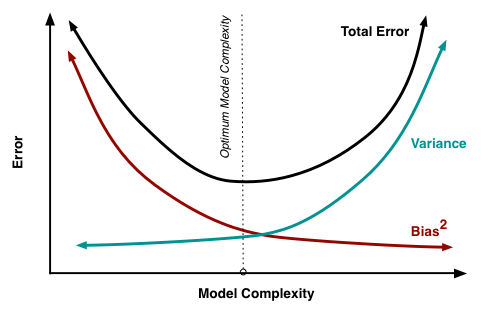

The ideal situation is when a model is not too complex or too simple and hasn't essentially memorized the data it has seen.

A model which has the capacity to learn patterns in data and apply it to unseen data is said "to generalize".

## Generalization

Model not too complex or too simple
* Able to capture patterns in the data

Model hasn't "memorized" the data
* Able to cope with unseen data

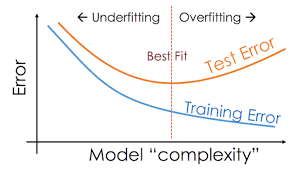


Let's say we have a model which we train with some data.

We measure the performance of the model (here, it's the error but could also be accuracy or any other metric) in two ways: by seeing how well the model does when tested using the data it was trained on, and how it does when tested on completely new, unseen, data.

However, on the unseen data (which the model is never allowed to learn from) error starts to go up, because the model has lost its capacity to generalize. It has learned the exact properties of the training data.

Slight differences between the training data and unseen data now cause problems for the model.


## Generalization

In [ ]:
def error(pol_n):
    zn = np.polyfit(x, y, pol_n) # fit polynomial of degree n
    pn = np.poly1d(zn)
    train_error = ((pn(x) - y)**2).sum()
    test_error = ((pn(x_new) - y_new)**2).sum()
    return train_error, test_error

In [ ]:
pol_ns = [1,2,3,5,6]
errors = np.array([error(pol_n) for pol_n in pol_ns])

plt.plot(pol_ns,errors[:,0])
plt.plot(pol_ns,errors[:,1])
plt.xlabel("Poly degree n")
plt.ylabel("Error")
plt.legend(["Train error", "Test error"]);

## Generalization

- Best model

In [ ]:
plt.figure(figsize=(10,6))
_ = plt.plot(x, y, 'o', x_new, y_new, 'v',  xp, p2(xp), '-.')
plt.ylim(60,110)
plt.grid(color='lightgray')
plt.show()

## True risk vs. empirical risk

- We can formalize the goal of optimizing our model for unseen data
- The true risk is defined as the expected loss over all possible data: $$R_{true} = E_{x \sim P(X)}[L(x)]$$

- Since we don't know the true distribution of data, we have to optimize our model based on the training data, minimizing the empirical risk: $$R_{emp} = \frac{1}{N_{train}} \sum_{train} L(x_{train})$$

- And estimate true risk by calculating its performance on the test data: $$\hat{R}_{true} = \frac{1}{N_{test}} \sum_{test} L(x_{test})$$


## Data partitioning

Avoid overfitting: split up your data

Training (70% to 90%)
- The data the model will learn from

Testing (5% to 15%)
- Data used to measure model's performance

Validation (5% to 15%)
- Data used to fine-tune the model

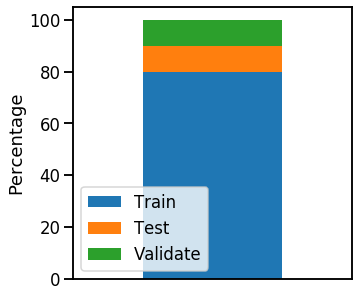

Overfitting is generally more of a problem than underfitting. The most common approach to avoiding it is to partition data into two or three sets.

The training data is the largest set and is used by the model to learn the properties of the data.

The testing data should never be seen by the model during training. It should only be used to evaluate model's performance.

The validation set is used to fine-tune model hyperparameters. For example, neural network architectures generally have many settings that can be tweaked, while others may have few. Finding the optimal values for these can improve model's performance.

There are some other terms used (such as development set) and some people use test/validation the other way round.

But the key idea here is that you can avoid overfitting if you evaluate your model using data which is totally separate from your training data.

The exact proportions will depend on the size of your dataset. For large datasets you can use smaller percentages for testing/validation, but with smaller datasets you may need a larger percentage for testing to ensure the number of test items is reasonable.

## Data partitioning: be careful

* Data is often pre-processed
    * Imputing missing values
    * Normalising values to share a scale
* Don't use the whole dataset for this!
* Use only the training set to fit the pre-processing tools on the training set and transform the test set.

One thing to be wary of is letting data leak between your partitions.

For example, if your dataset has a column for "cost" but some are missing, you can impute the missing values by using the mean of that column.

Or, as is more common in machine learning, you can rescale column values so that they are all in the same range. This makes it easier to interpret some models, as all feature weights are also scaled to the same range.

This should be done per data partition, so that each partition is pre-processed using its individual characteristics. 

## Data partitioning: be careful

* If the data is time series, watch out for the look-ahead bias - always train models on the past data.
* It is good practice to shuffle the data before partitioning for multiple purposes:
    - Makes sure that there is no order in the data
    - Avoids any biases from the data collection / dataset design
* Things to watch out for when shuffling:
    * Do not shuffle time series data before performing cross-validation!
    * For non-time series data: make sure that your data is IID (Independent and Identically Distributed). If not, make sure that you do not have dependent entries across the splits.

- **Data non-stationarity** - in its simplest definition, the data is considered stationary when its mean and variance does not differ when sampling with uniform distribution, without replacement. 
    - Talking about the time series: mean and variance are supposed to be constant in time.

- **Independent entries** in the data - the observations should not come from repeated measurements or matched data. This might include correlated time series, where each point in time across all the time series is a source of dependent entries due to their correlation. The other very common example is duplicates in the dataset - if such a dataset is partitioned before they are removed, it would lead to the data leakage. 

## Shuffling  data in python

* When training a neural network and the order of data within each epoch is the same, then the model may exploit it to reduce the training error, but fail to generalise later.


* Such overfitting may occur if your data is sorted by class or target.


* Shuffling data serves the purpose of reducing variance and ensuring the train, test, and validation sets resulting from splitting are representative of the overall distribution of the data.

## Splitting up data in python

In [ ]:
from sklearn.model_selection import train_test_split

x = [1.1, 1.2, 0.2, 0.1, 0.3, 1.5, 1.7, 1.6, 0.4, 0.5]
y = ['A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B']

comb_x = x + x_new
comb_y = y + y_new

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=1)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

x_train, x_test, y_train, y_test, x_val, y_val

`sklearn` makes it easy to split data up into train/test: just pass your inputs (`x`) and outputs (`y`) to `train_test_split`, and tell it how much to use as testing or training.

This returns four new lists: `x`/`y` for training, and `x`/`y` for testing.

Each is just a random subset of the original. However, if you set the `random_state` argument to a fixed value, the outcome will always be the same each time you make the lists. This can be useful for exactly reproducing results later on, by making sure the same random splits happen each time.

If you want a validation set, then you can use the same function but pass it the test `x`/`y` and split it into two halves.

The end result is three sets of data, each composed of the inputs (`x`) and outputs (`y`), with the proportions 60/20/20.

## Cross-validation

* Train/test split uses only part of data to train (e.g. 80%)
* Can we create multiple splits, to use the whole data for training?
* Technique: cross-validation

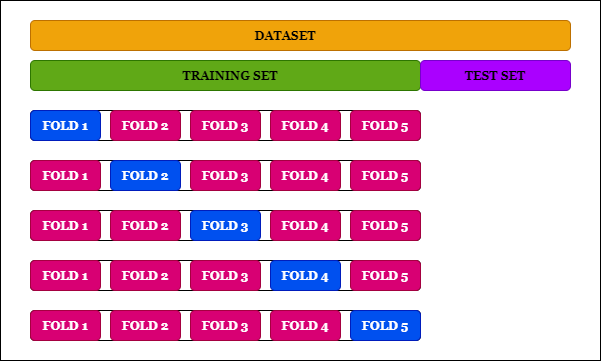

## Cross-validation

* Exhaustive: leave $n$ out
    * $p$ data points, create $C^{p}_{n}$ splits of size $p-n$ and $n$
    * For $p=100$ and $n=10$, number of splits is 17,310,309,456,440
* Non-exhaustive:
    * $k$ fold CV - split data into $k$ partitions, $k-1$ partitions are used for training and 1 partition is used for testing
    * Subsets can be random or stratified

There are two forms of cross-validation.

In exhaustive cross-validation, every data point gets a turn at being in the training set and in the test set. The test set can be any number between $1$ and $p-1$. For a small dataset of 100, using 10 for testing, there are over 17 trillion combinations. It's probably not feasible to train that many models, just to make sure you haven't overfitted...

Instead, non-exhaustive approaches are more commonly used. Here, you determine how many data subsets you will create and use those to train and evaluate your model. The number of subsets you select usually depends on how long training the model takes.

The subsets can be random: there is no consideration of which data points go into test/train.

Or they can be stratified: the train/test splits have an equal balance of the classes (for classification tasks) or have similar means (for regression tasks). This can help avoid train/tests splits that are imbalanced or noisy.

## Choosing $k$ in $k$-fold cross validation

- Estimate prediction error as average error of validation sets over all splits.
- Typical choice of $k$ are $k=5$ and $k=10$.
- Larger $k$ means less bias towards overestimating the true expected error, but higher running time. 
- In the extreme case of $k=n$, you get Leave-One-Out CV.


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

## Cross-validation in sklearn

In [ ]:
x = np.array([1.1, 1.2, 1.5, 1.7, 1.6, 0.4, 0.5, 0.2, 0.1, 0.3])
y = np.array(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

kf5 = KFold(n_splits=5)

In [ ]:
for (train, test) in kf5.split(x,y):
    print(f'Training: {x[train]} \t Testing: {x[test]}', '\n')
    print(f'Training: {y[train]} \t Testing: {y[test]}', '\n')

`sklearn` has useful classes for putting cross-validation into practice. And many algorithms in `sklearn` can be directly configured to do cross-validation for you.

The `sklearn.model_selection` module can be used to directly implement CV, for instance, `.KFold` returns an object with specified $k$. `.split()` can then be used to pass in `x`/`y` data and return subsets of data.

Here's an example of `KFold`.

Input/output pairs are in `numpy` arrays. `KFold` returns indices against these arrays, to select subsets.

The output is deterministic as the folds are the same every time. However, if you want to shuffle the items within each fold, there is a shuffle argument. This is `False` by default. Use `random_state` to ensure the same shuffling each time, as with `train_test_split`.

In [ ]:
from sklearn.model_selection import StratifiedKFold

## Stratified k-fold

In [ ]:
x = np.array([1.1, 1.2, 1.5, 1.7, 1.6, 0.4, 0.5, 0.2, 0.1, 0.3])
y = np.array(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])

skf5 = StratifiedKFold(n_splits=5)

In [ ]:
for (train, test) in skf5.split(x,y):
    print(f'Training: {x[train]} \t Testing: {x[test]}', '\n')
    print(f'Training: {y[train]} \t Testing: {y[test]}', '\n')

In the previous example, we only had two classes - A and B - and a lot of the splits only had 1 class in the test set. This example is extreme because the test size is only 2 but in any case, there might be situations where we want to ensure various classes in the test set. One can do so by using ` sklearn.model_selection.StratifiedKFold` to preserve the percentage of samples for each class.

You can see how Stratified KFold balances the number of examples of A and B in all train and test splits.

This is important when there are unbalanced classes, with few samples of a specific class. Stratified KFold makes sure there are samples of rare classes in all the training sets.

Again, if you set `shuffle=True` then you can also set `random_state` to a fixed value to get the same outcome each time.

## Cross-validation: reporting

* Training multiple models with cross-validation = multiple scores/metrics/etc.
* Report the mean and standard deviation
* `stdev` informs how dependent the performance is on the data split

In [ ]:
import random as r, seaborn as sns, pandas as pd

model_a = pd.DataFrame([{'model':"A", 'acc':min(r.gauss(80, 20), 100)} for i in range(5)])
model_b = pd.DataFrame([{'model':"B", 'acc':min(r.gauss(70, 5), 100)} for i in range(5)])

data = pd.concat([model_a, model_b])

In [ ]:
data.groupby('model').describe()

You've used cross-validation to train a binary classification model multiple times, measuring accuracy each time. How do you interpret and report all the numbers?

Simply report the mean accuracy and its standard deviation. If you have different kinds of model you are evaluating, this can be done neatly in a table.

Or you can visualise it in a chart, with error bars.

We've generated some imaginary performance data for two models here, trained using 5-fold cross-validation.

The table reports the mean, std and min/max accuracy for each model. This gives you an exact detailed overview of performance.

It generally shows that while model A gets slightly higher mean accuracy, there is more variation based on which data it is trained on. Model B scores lower but is more consistent. This information can help you decide which model is best suited to your needs.


### Cross-validation: reporting

In [ ]:
sns.barplot(data=data, x='model', y='acc', ci='sd');

Note: you can generate your own charts with just the mean/stdev figures, but `seaborn`'s `barplot` will calculate and plot all this automatically if you pass it the raw data. Just set `ci` to `"sd"` to use standard deviation rather than 95% confidence intervals, unless you do actually want confidence intervals!

Here, the bar chart shows the mean accuracy with an error bar representing the standard deviation. This communicates how the two models compare in a much quicker manner, more suited to slides/presentations than a table full of numbers.

## Choosing an evaluation metric

Key factors:

* The problem that we are trying to solve (e.g. classification or regression) 

* The training data characteristics - balanced or imbalanced class labels or target variable distribution

* Domain - whether false negatives are important for us (explosives detection at the airport, as an example)

Also depends on the type of classification models:
* Deterministic: the same input gives the same output (no randomness included)
* Probabilistic: the same input might give different output (randomness included)

Note: probabilisitic and deterministic model types might have a different meaning. Namely, they might define whether the predictions are drawn from the distribution which describes the training data (Bayesian style) or from the actual training data. However, this is out of the scope of the current module and we stick to the initial definition throughout the module.

## Evaluation criterion for classification

- For classification, an obvious criterion is classification accuracy (balanced accuracy), which evaluates predictive power in terms of the proportion of correctly classified observations calculated among all observations. 

- This might not be so informative when the classes are imbalanced (e.g. when one class is only 10% of data then the classification accuracy of any model is higher than 90%).

- Other criteria include the **true positive rate** (TPR) and **false positive rate** (FPR) where
\begin{align*}
TPR &= \frac{TP \  (\text{true positives})} {TP + FN  \ (\text{false negatives})}  = \text{sensitivity} = \text{recall}, \\
FPR &= \frac{FN}{FP  \ (\text{false positives}) + TN  \ (\text{true negatives})} = 1 - \text{specificity}.
\end{align*}
- TPR describes how good the model is at predicting the positive class when the actual output is positive and the FPR summarises how often a positive class is predicted when the actual outcome is negative. 


## Evaluation criterion for classification

- The TPR is also known as **sensitivity** or **recall**. Recall is frequently used with **precision**, which describes how good the model is at predicting the positive class and can be calculated by
\begin{align*}
\text{Precision} = \frac{TP}{TP + FP}.
\end{align*}
- The **F-measure** is a composite measure combining precision and recall and penalizing extreme values. In the most commonly-used form of F-measure (in which it is the harmonic mean of precision and recall), recall is weighted twice as important as precision, expressed by
\begin{align*}
\text{F-measure} = \frac{2 \times \text{Precision} \times \text{Recall}} {\text{Precision} + \text{Recall}}.
\end{align*}


### Cross-validation: full example

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn import datasets 

data = datasets.load_wine()
model = KNN()

Here is a full example of using cross-validation and getting results for accuracy, precision, recall, and F1 for each fold.

The key to this is the `sklearn.model_selection.cross_validate` function. This saves you from having to write loops for getting data subsets, training the model, evaluating it, storing results somewhere...you never need to call `.fit()` or `.predict()`!

You pass it a model, your `x` and `y` data, the number of folds you want, and the scores you want it to measure.

You can pass **any** valid cross-validation object or just the number of folds you want. `sklearn` will figure out if you need stratified or random kfold.

You can use a custom dictionary here to select the metrics you want. The keys should be the name you give to the metric and the value should be a valid `sklearn` metric. For a full list, import `sklearn` and then call `sorted(sklearn.metrics.SCORERS.keys())` - lots of choices!

### Cross-validation: full example

In [ ]:
# Example of 5 fold CV on wine dataset using KNN
my_cv = StratifiedKFold(5)
my_metrics = {'accuracy': 'accuracy','precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'}
scores = cross_validate(model, data.data, data.target, cv=my_cv, scoring=my_metrics)
scores_df = pd.DataFrame(scores)

scores_df

The results are stored in a dictionary. You can easily put these in a `pandas` DataFrame and look at them visually.

Each row is the result of a fold. 

The first two columns give information about how long the model took to train (fit) and how long it took to generate the scores. The remaining columns give the results of the metrics you selected. Note that these column names match whatever keys you used in the `my_metrics` dictionary, but with `"test_"` prepended.

## Cross-validation: time series

- If the data has an ordering, as in time series, k-fold cannot simply choose random data points for the splits
- Instead create sets of sub-sequences, and train your model by predicting future samples in part of them, and validate on unseen sequences

![](img/time_series_validation.png)

In the time series setting, cross-fold validation might not make sense any more because we could be discarding the order of the data. 

Typically we instead do something like this: the data is sliced into one very short sequence and we try to predict the following point. 

Then the next "fold" is a slightly longer sequence, where we try to predict the next value, and we repeat until we've used all of the data we have.

## Hyperparameter tuning

* Models learn parameters: values estimated from data
    * E.g. weights, biases
* Hyperparameters: control how the model works
    * Loss function, regularization strength, learning rate
* Can be fine-tuned using data
    * Set hyperparameter -> train -> evaluate
    * Change hyperparameter
    * Repeat

Parameters and hyperparameters are very different. We rarely have control over parameters: these are what the model has to learn.

Hyperparameters are ways of influencing how the model learns. These are generally choices we need to make. Sometimes we might use specific settings based on experience, or we might just go with whatever default settings a model has. Alternatively, we can fine-tune the setting by trying lots of different values for it and seeing what works best.

However, we don't want to evaluate different settings using our test set! This could result in overfitting, which we want to avoid so that the model we train is able to generalise to new, unseen, data.

So, a validation (or development) set can be used for this.

For each differently-tuned model, train on the training data and evaluate on the validation set. Then, once you have found the optimal hyperparameter settings, use those in your model and evaluate using the test set.

This test set will therefore not have been used to set model parameters or hyperparameters. You can be somewhat confident that you are evaluating a model with new data which it has not had a chance to learn from directly.

## Hyperparameters: grid search

* A technique for trying different hyperparameter settings
    * $h$ hyperparameters with $n$ possible values: $n^h$ combinations
    * `h=6`, `n=10` : 1000000 combinations
* Combined with k-fold cross-validation
    * $k \times n^h$ combinations
* `sklearn.model_selection.GridSearchCV`
    * Tries every single combination
* `sklearn.model_selection.RandomizedSearchCV`
    * Tries only a random subset of possible combinations

Grid Search involves trying every possible combination of values for all hyperparameters. So if you are tuning `learning_rate` and `dropout`, you might try ten values in the range 0.00001 to 1.0, for each. This will give you an idea of the best combination of `learning_rate` and `dropout` to use.

When you combine this with cross-validation (to make sure your results are not a fluke due to the data partition used), the number of models you need to run really grows. Even if you are able to run many models in parallel, it could still take a while.

An alternative is to try a randomly sampled subset of all possible combinations.

## Grid search: full example

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import datasets 

data = datasets.load_wine()
model = KNN()
hyperparams = {"n_neighbors":[1,2,3]}

gridsearch = GridSearchCV(model, hyperparams, cv=5, scoring='accuracy')

gridsearch.fit(data.data, data.target);

Here is an example of GridSearchCV being used to evaluate the k-nearest neighbours classifier. This model assigns a class to a data point, based on the classes of its nearest neighbours. The number of neighbours to use for this is a hyperparameter we can play with.

The GridSearchCV object is given a model, a dictionary of the hyperparameters to try for that model, and the number of cross-validation folds to use. You can either specify a range of metrics to use,  using a dictionary, or you can select a specific one. Here, accuracy is being used.

The data used here is a toy dataset included in `sklearn`, with 178 wines assigned to 3 groups.

## Grid Search: full example

In [ ]:
print(gridsearch.cv_results_.keys(), '\n')

print('mean_test_score', gridsearch.cv_results_['mean_test_score'])

print('rank_test_score', gridsearch.cv_results_['rank_test_score'])

print(gridsearch.best_estimator_)

The `GridSearchCV` object, once it has been passed data to train on, stores all results in its `cv_results_` attribute.

This is a dictionary containing lots of information. `mean_test_score` shows the mean score for the metric we used across all folds, for each hyperparameter setting. `rank_test_score` shows the ranks of the hyperparameters so you can identify which setting was the best.

You may have noticed that there is no train/test/validation split done here. It isn't necessary if we are doing grid search with cross-validation: using multiple folds of the data has the same effect and it's all taken care of by `sklearn`.

If you have used a single metric for scoring, then once the grid search is complete the best model will be available to you via the `best_estimator_` attribute. You can then save this model or use it on new data in the future.

## Bayesian optimization for hyperparameter optimization

- Beyond grid search, there are other methods to tune hyperparameters.
- **Bayesian optimization** takes a sequential strategy to optimize functions that are difficult or expensive to evaluate. 
- Treat the objective function as a random function and place a Gaussian process (GP) prior over it. 
- After the function is evaluated at some data points, the posterior distribution can be calculated and used to determine the next candidate point. 
- Bayesian optimization takes advantage of the tractable posterior distribution induced by the GP.
- To read more: https://arxiv.org/abs/1206.2944, https://arxiv.org/pdf/1807.02811.pdf

Grid search might seem naive but it's surprisingly effective. In general, hyperparameter search is still an open research problem. 

We're not really sure whether there exists a general heuristic-guided hyperparameter tuner, or whether it should use random exploration, gradient methods, Bayesian optimization, or even reinforcement learning. There have been many attempts to improve hyperparameter search but for the most part we don't yet have a convincing go-to framework. 

In general, if you want to go beyond grid search it's good to start with a random exploration based parameter-free model like hyperband. 

# Summary

* Overfitting and underfitting reduce model's ability to generalize
* Partition your data to increase confidence in assessments of model performance
* Use cross-fold validation to evaluate predictions

The goal of ML is to make accurate predictions, and tests of overfitting and cross validation etc. are methods to help assess if that's what we're doing. 

In classical statistics, you might have some additional questions when validating, for example:
- Could there be bias in our data that we should be aware of?
- Is the model a good fit for our data? (goodness of fit tests)
- Are our assumptions satisfied?

Model evaluation is a complementary lecture, that we will cover later, in which we see different forms of evaluating the model. For instance, residual analysis is another big area for validation when we have a parametric model, like in regression or time series.

## Jupyter Exercise

Model Validation

Go to file `model-validation.ipynb`